# Generative Adversarial Networks

GANs were first reported in 2014. They have the capability to generate new samples similar to the data they were trained on. For example, creating new faces after being trained on large datasets of faces.

We'll build two networks, a generator and a discriminator. The idea is that we are training a generator to produce samples that the discriminator compares against a sample of real data. Eventually, the generator is able to fool the discriminator into passing a generated sample as real.

The coding is essentially really simple; the real thing is tuning the hyperparameters and the training time involved.

- Discriminator overpowering Generator:

If the discriminator classifies all examples as fake, there is no progress. You may want to have discriminator ouput be unscaled instead of sigmoid.

- Generator overpowering Discriminator: Mode Collapse

The generator discovers some weakness in the discriminator, and the generator ends up producing a similar example regardless of variation in input. You can try adjusting the training rate or changing layers of the discriminator in an attempt to make it better.

GANs are so powerful, they are limited by the hardware that you are using.



# Generate numbers based off the MNIST dataset

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


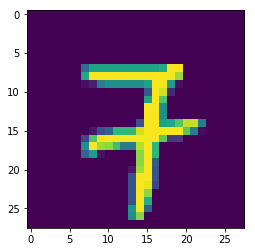

In [12]:
plt.imshow(mnist.train.images[14].reshape(28, 28));

In [13]:
# Generator
def generator(z, reuse=None):
    # gen for generator. The goal is to allow to have modular sections of parameters.
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        
        # leaky relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        # second layer, same thing
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        # output
        output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
        
        return output      
        
        

In [15]:
# Discriminator
def discriminator(z, reuse=None):
    # dis for discriminator. The goal is to allow to have modular sections of parameters.
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        
        # leaky relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        # second layer, same thing
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        # output
        logits = tf.layers.dense(hidden2, units=1) # probability of being real/fake
        output = tf.sigmoid(logits)
        
        return output, logits

In [16]:
# Real Images
real_images = tf.placeholder(tf.float32, shape=[None, 784])

# Noise
z = tf.placeholder(tf.float32, shape=[None, 100])

# Generator and Discriminator
G = generator(z)
D_output_real, D_logits_real = discriminator(real_images)

In [17]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [18]:
# Losses
def loss_function(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [19]:
D_real_loss = loss_function(D_logits_real, tf.ones_like(D_logits_real)*0.9) # I want all elements to be REAL (times smoothing factor 0.9)

D_fake_loss = loss_function(D_logits_fake, tf.zeros_like(D_logits_real))

D_loss = D_real_loss + D_fake_loss

In [20]:
G_loss = loss_function(D_logits_fake, tf.ones_like(D_logits_fake))

In [21]:
learning_rate = 0.001

In [22]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [23]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [33]:
# Training Session
batch_size = 1000
epochs = 100
init = tf.global_variables_initializer()

samples = []

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            
            batch = mnist.train.next_batch(batch_size)
            
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1 # rescale for the tanh
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
            
            _ = sess.run(G_trainer, feed_dict={z:batch_z})
        
        print('On Epoch {}'.format(epoch))
        
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        
        samples.append(gen_sample)
    

On Epoch 0
On Epoch 1
On Epoch 2
On Epoch 3
On Epoch 4
On Epoch 5
On Epoch 6
On Epoch 7
On Epoch 8
On Epoch 9
On Epoch 10
On Epoch 11
On Epoch 12
On Epoch 13
On Epoch 14
On Epoch 15
On Epoch 16
On Epoch 17
On Epoch 18
On Epoch 19
On Epoch 20
On Epoch 21
On Epoch 22
On Epoch 23
On Epoch 24
On Epoch 25
On Epoch 26
On Epoch 27
On Epoch 28
On Epoch 29
On Epoch 30
On Epoch 31
On Epoch 32
On Epoch 33
On Epoch 34
On Epoch 35
On Epoch 36
On Epoch 37
On Epoch 38
On Epoch 39
On Epoch 40
On Epoch 41
On Epoch 42
On Epoch 43
On Epoch 44
On Epoch 45
On Epoch 46
On Epoch 47
On Epoch 48
On Epoch 49
On Epoch 50
On Epoch 51
On Epoch 52
On Epoch 53
On Epoch 54
On Epoch 55
On Epoch 56
On Epoch 57
On Epoch 58
On Epoch 59
On Epoch 60
On Epoch 61
On Epoch 62
On Epoch 63
On Epoch 64
On Epoch 65
On Epoch 66
On Epoch 67
On Epoch 68
On Epoch 69
On Epoch 70
On Epoch 71
On Epoch 72
On Epoch 73
On Epoch 74
On Epoch 75
On Epoch 76
On Epoch 77
On Epoch 78
On Epoch 79
On Epoch 80
On Epoch 81
On Epoch 82
On Epoch 83
On

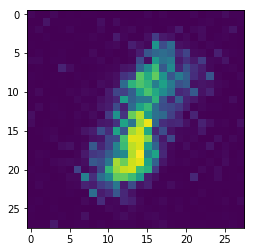

In [40]:
plt.imshow(samples[-1].reshape(28, 28)); # just noise